<a href="https://colab.research.google.com/github/JAXMES/Artificial-Intelligence/blob/main/Week11_Homework_JD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 11 Homework
In this assignment, we will analyze the Titanic dataset with the Decision Tree model and the Random Forest model.

On April 15, 1912, during her maiden voyage, the widely considered unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

1. Load the data using the code given below. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
titanic_url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
titanic = pd.read_csv(titanic_url).drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1).dropna()
titanic['Sex'] = titanic['Sex'].apply(lambda x: int(x == 'male'))
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


The features are:
- Survived: whether the passenger survived. This is the target feature.
- Pclass: the ticket class
- Sex: 0 means female, 1 means male.
- Age
- SibSp: number of siblings / spouses aboard the Titanic
- Parch: number of parents / children aboard the Titanic
- Fare

2. Split the data into training set (80%) and test set (20%)
3. Build a decision tree model on the training set for max_depth = 2, 3, 4. Use the test set to determine which model has the best performance.
4. Use `plot_tree` function from `sklearn` to visualize the best decision tree model. Describe one group of passengers are likely to survive. If the generated graph is too small, you can add the statement `plt.figure(figsize=(12,12))` **before** the `plot_tree` statement to make the graph larger.
5. Build a random forest model with the same `max_depth` value and `n_estimators=100`. Show the accuracy score on the test set.

In [ ]:
# 2. Split the data into training (80%) and testing(20%)

from sklearn.model_selection import train_test_split
titanic_train, titanic_test = train_test_split(titanic, test_size = 0.2)

In [ ]:
# 3. Build a decision tree model on the training set for max_depth = 2, 3, 4. Use the test set to determine which model has the best performance

from sklearn.tree import DecisionTreeClassifier

input_cols = titanic_train.columns[1:]
X = titanic_train.loc[:, input_cols]
y = titanic_train['Survived']

#Max_depth = 2
tree_clf_2 = DecisionTreeClassifier(max_depth=2,
 random_state=42)

tree_clf_2.fit(X, y)

#Max_depth = 3
tree_clf_3 = DecisionTreeClassifier(max_depth=3,
 random_state=42)

tree_clf_3.fit(X, y)

#Max_depth = 4
tree_clf_4 = DecisionTreeClassifier(max_depth=4,
 random_state=42)

tree_clf_4.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Best performance
from sklearn.metrics import accuracy_score

predictions_2 = tree_clf_2.predict(titanic_test[input_cols])
accuracy_2 = accuracy_score(titanic_test['Survived'], predictions_2)
print(accuracy_2)

predictions_3 = tree_clf_3.predict(titanic_test[input_cols])
accuracy_3 = accuracy_score(titanic_test['Survived'], predictions_3)
print(accuracy_3)

predictions_4 = tree_clf_4.predict(titanic_test[input_cols])
accuracy_4 = accuracy_score(titanic_test['Survived'], predictions_4)
print(accuracy_4)


0.7902097902097902
0.7622377622377622
0.7692307692307693


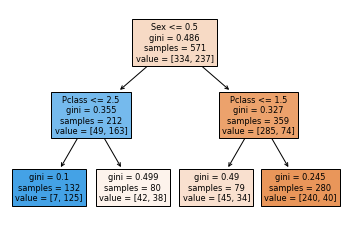

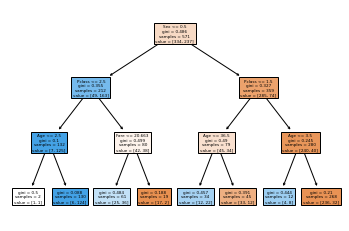

<Figure size 864x864 with 0 Axes>

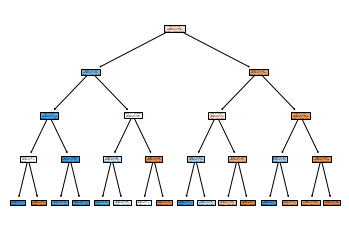

<Figure size 864x864 with 0 Axes>

In [ ]:
# 4. Use plot_tree function from sklearn to visualize the best decision tree model. Describe one group of passengers are likely to survive. If the generated graph is too small, you can add the statement plt.figure(figsize=(12,12)) before the plot_tree statement to make the graph larger.

from sklearn.tree import plot_tree
plot_tree(tree_clf_2, feature_names=X.columns, filled=True)
# Max_depth = 2
plt.show()

# Max_depth = 3
plot_tree(tree_clf_3, feature_names=X.columns, filled=True)
plt.figure(figsize=(12,12))
plt.show()

# Max_depth = 4
plot_tree(tree_clf_4, feature_names=X.columns, filled=True)
plt.figure(figsize=(12,12))
plt.show()

In [ ]:
# 5. Build a random forest model with the same max_depth value and n_estimators=100


from sklearn.ensemble import RandomForestClassifier
input_cols = titanic_train.columns[1:]
X = titanic_train.loc[:, input_cols]
y = titanic_train['Survived']

#Max_depth = 2
rf_clf_2 = RandomForestClassifier(
 n_estimators=100,
 max_depth=2,
 n_jobs=-1)
rf_clf_2.fit(X, y)


#Max_depth = 3
rf_clf_3 = RandomForestClassifier(n_estimators=100,
 max_depth=3,
 n_jobs=-1)
rf_clf_3.fit(X, y)

#Max_depth = 4
rf_clf_4 = RandomForestClassifier(
 n_estimators=100,
 max_depth=4,
 n_jobs=-1
)
rf_clf_4.fit(X, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
# Show the accuracy score
test_predictions_2 = rf_clf_2.predict(titanic_test[input_cols])
accuracy_2 = accuracy_score(titanic_test['Survived'], test_predictions_2)
print(accuracy_2)

test_predictions_3 = rf_clf_3.predict(titanic_test[input_cols])
accuracy_3 = accuracy_score(titanic_test['Survived'], test_predictions_3)
print(accuracy_3)

test_predictions_4 = rf_clf_4.predict(titanic_test[input_cols])
accuracy_4 = accuracy_score(titanic_test['Survived'], test_predictions_4)
print(accuracy_4)

0.7762237762237763
0.8251748251748252
0.8111888111888111
